### **Importation des bibliothèques**

In [207]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler,Normalizer
from sklearn.metrics import  accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import LabelEncoder,OneHotEncoder  

### **Chargement des données**

In [208]:
data=pd.read_csv('diabets.csv')

In [209]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


- Pregnancies	Nombre de grossesses

- Glucose	Taux de glucose

- BloodPressure	Tension artérielle

- SkinThickness	Épaisseur de la peau

- Insulin	Taux d’insuline

- BMI	Indice de masse corporelle (IMC)

- DiabetesPedigreeFunction	Facteur héréditaire du diabète

- Age	Âge

- Outcome	Résultat (1 = diabétique, 0 = non diabétique)

In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [211]:
data.shape

(768, 9)

In [212]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [213]:
data.duplicated().sum()

0

In [214]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


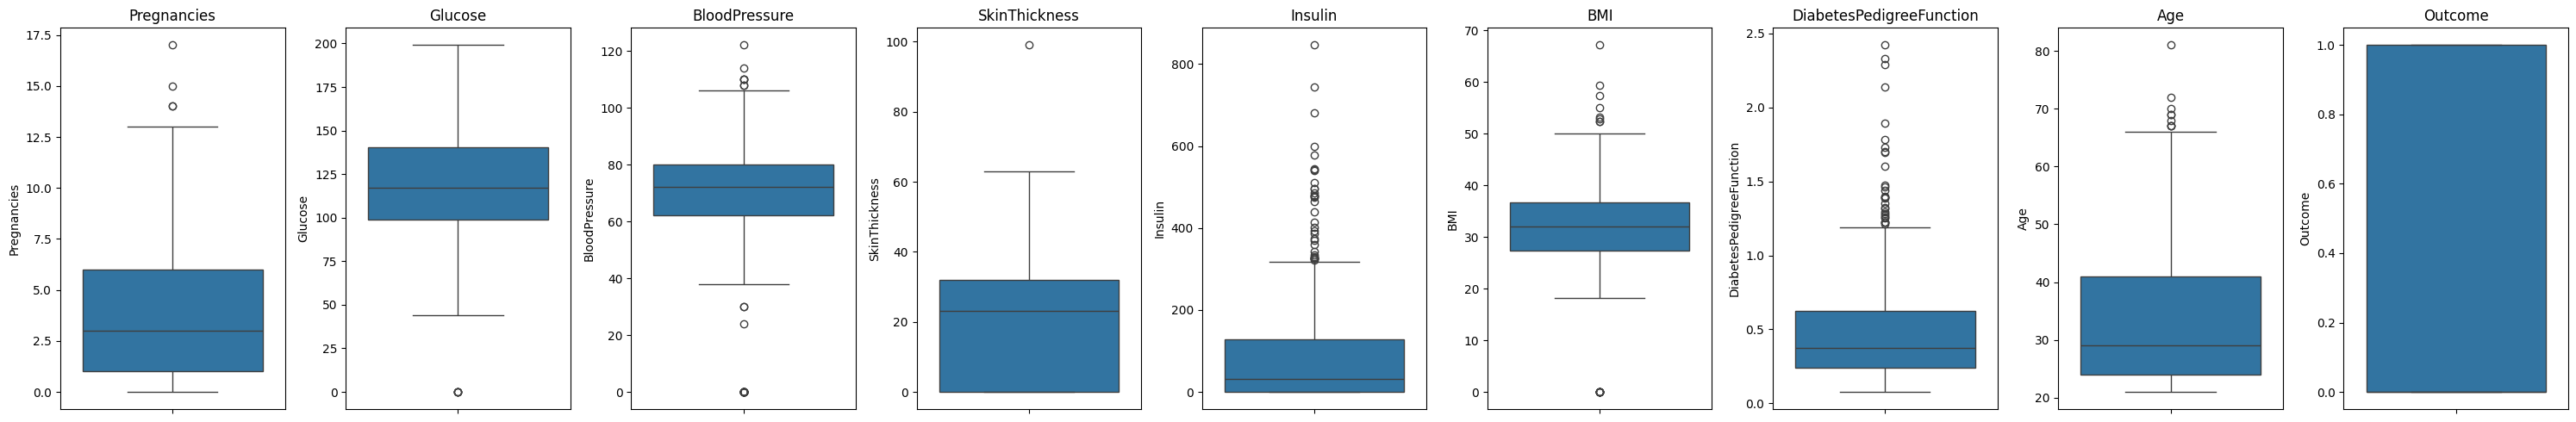

In [215]:
plt.figure(figsize=(30, 5))  # Ajuste la taille du graphique

for i, col in enumerate(data.select_dtypes(include='number').columns, 1,):
    plt.subplot(1, len(data.columns), i)  # Crée des sous-graphiques côte à côte
    sns.boxplot(y=data[col])
    plt.title(col)

plt.tight_layout()  # Ajuste les espacements=
plt.show()

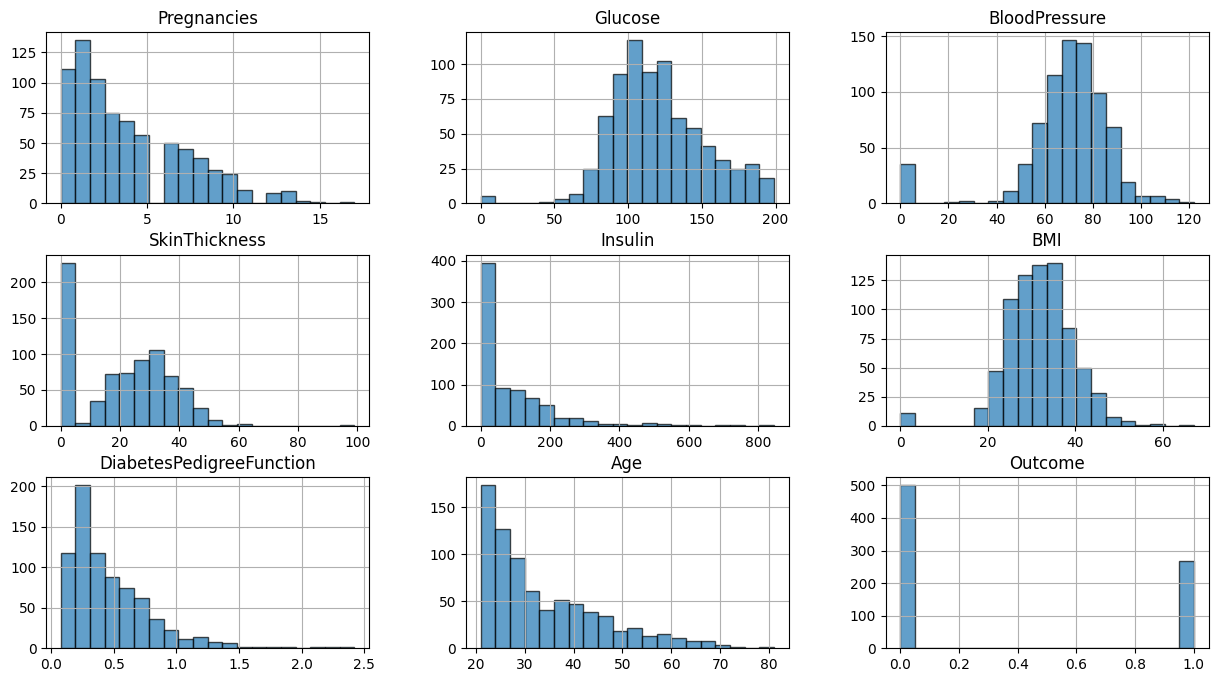

In [216]:
data.hist(edgecolor='black', alpha=0.7, figsize=(15,8), bins=20)
plt.show()

Pregnancies

In [217]:
# la méthode IQR
Q1 = data['Pregnancies'].quantile(0.25)  # 1er quartile (25%)
Q3 = data['Pregnancies'].quantile(0.75)  # 3e quartile (75%)
IQR = Q3 - Q1  # Intervalle interquartile
lower_bound = Q1 - 1.5 * IQR  # Limite inférieure
upper_bound = Q3 + 1.5 * IQR  # Limite supérieure
data.drop(data[data['Pregnancies']<=lower_bound].index, inplace=True)
data.drop(data[data['Pregnancies']>=upper_bound].index, inplace=True)

Glucose

In [218]:
# la méthode IQR
Q1 = data['Glucose'].quantile(0.25)  # 1er quartile (25%)
Q3 = data['Glucose'].quantile(0.75)  # 3e quartile (75%)
IQR = Q3 - Q1  # Intervalle interquartile
lower_bound = Q1 - 1.5 * IQR  # Limite inférieure
upper_bound = Q3 + 1.5 * IQR  # Limite supérieure
data.drop(data[data['Glucose']<=lower_bound].index, inplace=True)
data.drop(data[data['Glucose']>=upper_bound].index, inplace=True)

BloodPressure

In [219]:
# la méthode IQR
Q1 = data['BloodPressure'].quantile(0.25)  # 1er quartile (25%)
Q3 = data['BloodPressure'].quantile(0.75)  # 3e quartile (75%)
IQR = Q3 - Q1  # Intervalle interquartile
lower_bound = Q1 - 1.5 * IQR  # Limite inférieure
upper_bound = Q3 + 1.5 * IQR  # Limite supérieure
data.drop(data[data['BloodPressure']<=lower_bound].index, inplace=True)
data.drop(data[data['BloodPressure']>=upper_bound].index, inplace=True)

SkinThickness

In [220]:
# la méthode IQR
Q1 = data['SkinThickness'].quantile(0.25)  # 1er quartile (25%)
Q3 = data['SkinThickness'].quantile(0.75)  # 3e quartile (75%)
IQR = Q3 - Q1  # Intervalle interquartile
lower_bound = Q1 - 1.5 * IQR  # Limite inférieure
upper_bound = Q3 + 1.5 * IQR  # Limite supérieure
data.drop(data[data['SkinThickness']<=lower_bound].index, inplace=True)
data.drop(data[data['SkinThickness']>=upper_bound].index, inplace=True)

Insulin

In [221]:
# la méthode IQR
Q1 = data['Insulin'].quantile(0.25)  # 1er quartile (25%)
Q3 = data['Insulin'].quantile(0.75)  # 3e quartile (75%)
IQR = Q3 - Q1  # Intervalle interquartile
lower_bound = Q1 - 1.5 * IQR  # Limite inférieure
upper_bound = Q3 + 1.5 * IQR  # Limite supérieure
data.drop(data[data['Insulin']<=lower_bound].index, inplace=True)
data.drop(data[data['Insulin']>=upper_bound].index, inplace=True)

BMI

In [222]:
# la méthode IQR
Q1 = data['BMI'].quantile(0.25)  # 1er quartile (25%)
Q3 = data['BMI'].quantile(0.75)  # 3e quartile (75%)
IQR = Q3 - Q1  # Intervalle interquartile
lower_bound = Q1 - 1.5 * IQR  # Limite inférieure
upper_bound = Q3 + 1.5 * IQR  # Limite supérieure
data.drop(data[data['BMI']<=lower_bound].index, inplace=True)
data.drop(data[data['BMI']>=upper_bound].index, inplace=True)

DiabetesPedigreeFunction

In [223]:
# la méthode IQR
Q1 = data['DiabetesPedigreeFunction'].quantile(0.25)  # 1er quartile (25%)
Q3 = data['DiabetesPedigreeFunction'].quantile(0.75)  # 3e quartile (75%)
IQR = Q3 - Q1  # Intervalle interquartile
lower_bound = Q1 - 1.5 * IQR  # Limite inférieure
upper_bound = Q3 + 1.5 * IQR  # Limite supérieure
data.drop(data[data['DiabetesPedigreeFunction']<=lower_bound].index, inplace=True)
data.drop(data[data['DiabetesPedigreeFunction']>=upper_bound].index, inplace=True)

Age

In [224]:
# la méthode IQR
Q1 = data['Age'].quantile(0.25)  # 1er quartile (25%)
Q3 = data['Age'].quantile(0.75)  # 3e quartile (75%)
IQR = Q3 - Q1  # Intervalle interquartile
lower_bound = Q1 - 1.5 * IQR  # Limite inférieure
upper_bound = Q3 + 1.5 * IQR  # Limite supérieure
data.drop(data[data['Age']<=lower_bound].index, inplace=True)
data.drop(data[data['Age']>=upper_bound].index, inplace=True)

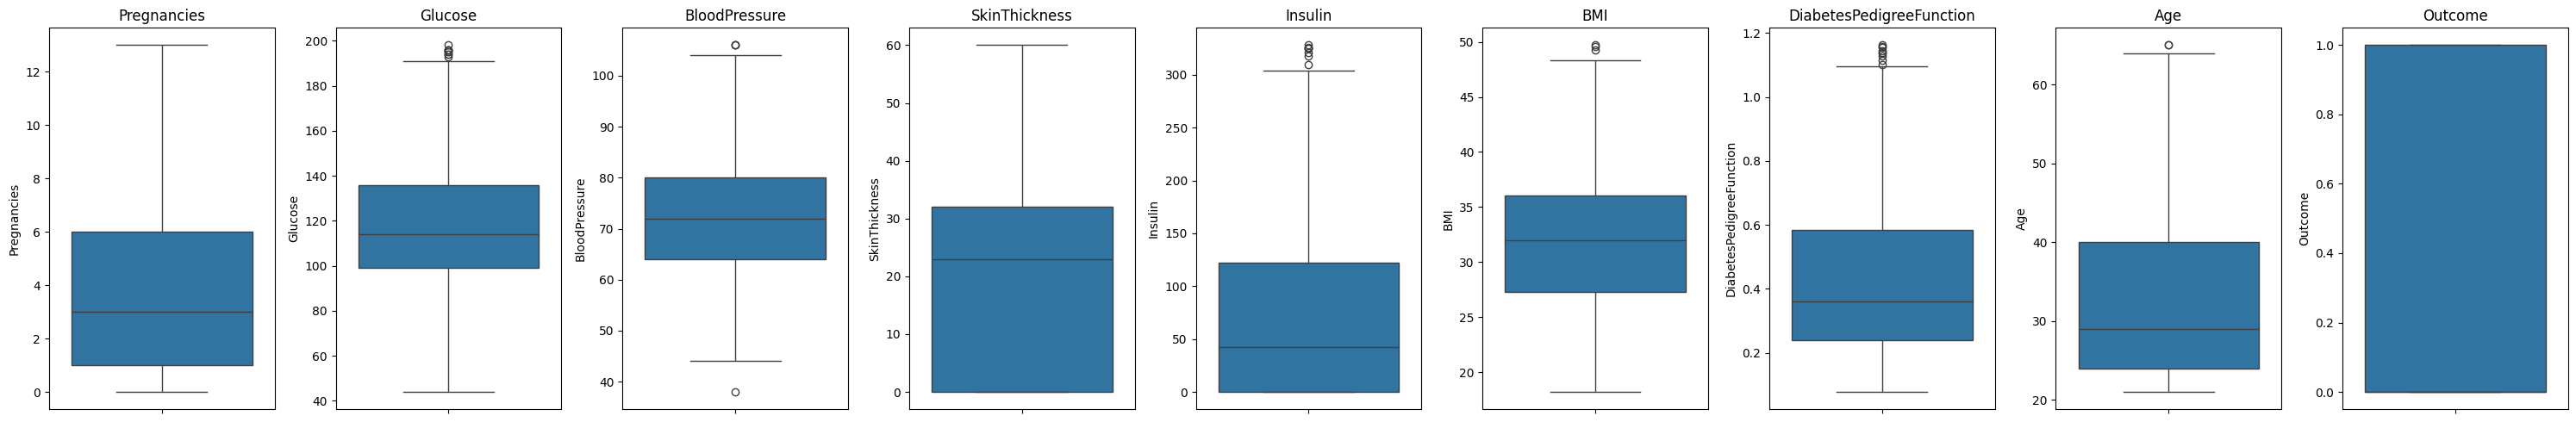

In [225]:
plt.figure(figsize=(30, 5))  # Ajuste la taille du graphique

for i, col in enumerate(data.select_dtypes(include='number').columns, 1,):
    plt.subplot(1, len(data.columns), i)  # Crée des sous-graphiques côte à côte
    sns.boxplot(y=data[col])
    plt.title(col)

plt.tight_layout()  # Ajuste les espacements=
plt.show()

In [226]:
data.shape

(636, 9)

# ***Partie : modele machine learning :***

## **LogisticRegression**

### **Séparation des features et du label**

- On crée une variable X qui contient toutes les colonnes (ou variables explicatives) du DataFrame data, sauf la colonne Outcome.

- Cette colonne est supprimée car elle représente la variable cible, c’est-à-dire ce que l’on veut prédire : ici, si la personne est atteinte de diabète ou non.

- On crée une variable y qui contient uniquement la colonne Outcome.

- Cette variable représente si la personne est diabétique (1) ou non diabétique (0).

- On sépare les données en deux parties :

    * X : les caractéristiques ou facteurs explicatifs tels que le nombre de grossesses (Pregnancies), le taux de glucose (Glucose), la pression artérielle (BloodPressure), l’épaisseur de la peau (SkinThickness), le taux d’insuline (Insulin), l’indice de masse corporelle (BMI), le facteur héréditaire du diabète (DiabetesPedigreeFunction) et l’âge (Age).

    * y : la variable cible (Outcome) indiquant si la personne est diabétique ou non.

In [227]:
X = data.drop(columns=['Outcome'])
y = data['Outcome']

### **Division des données pour l'entraînement et le test**

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Cette fonction divise les données en deux ensembles : un ensemble d'entraînement et un ensemble de test.

80% pour l'entraînement (X_train, y_train)

20% pour le test (X_test, y_test)

random_state=42 : pour rendre le tirage reproductible 

In [229]:
print(f"Taille du jeu d'entraînement : {X_train.shape}")
print(f"Taille du jeu de test : {X_test.shape}")

Taille du jeu d'entraînement : (508, 8)
Taille du jeu de test : (128, 8)


### **L'entrenement de model**

In [230]:
model_LogisticRegression = LogisticRegression(max_iter=1000)
model_LogisticRegression.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### **Prédiction sur les données de test**

In [231]:
y_pred = model_LogisticRegression.predict(X_test)

### **Visualisation des résultats**

###  Prédiction sur l'ensemble de test / visualisation :

In [232]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.73


- La précision du modèle sera affichée sous forme de pourcentage,  Accuracy: 0.73

### **Matrice de confusion**

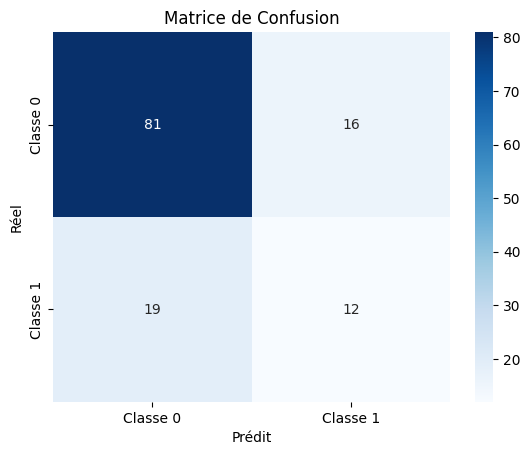

In [233]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

- Une matrice de confusion sera affichée à l'écran, permettant de visualiser la performance du modèle en termes de vrais positifs, vrais négatifs, faux positifs et faux négatifs.

### **Calcul de la courbe ROC**

In [234]:
y_scores = model_LogisticRegression.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

### **Affichage de la courbe ROC**

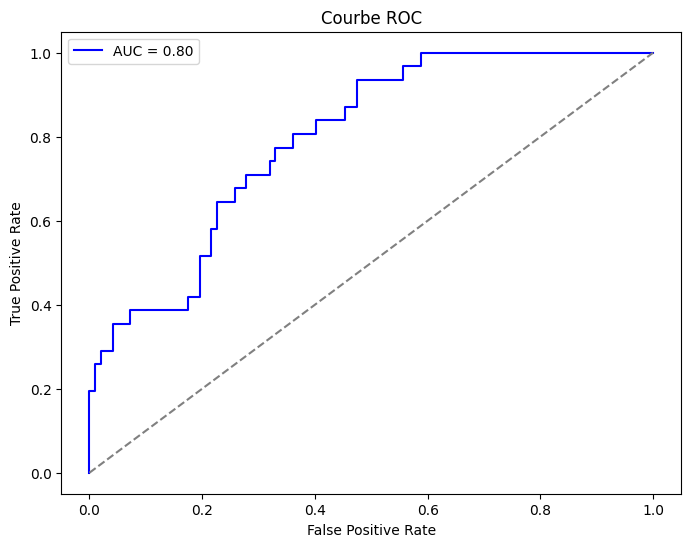

In [235]:
# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend()
plt.show()

AUC = 0.80 signifie que ton modèle pour prédire le diabète est assez performant et peut distinguer correctement les patients diabétiques des non diabétiques 80% du temps.

- Calcul de la courbe ROC pour évaluer le compromis entre le taux de faux positifs et le taux de vrais positifs.
- Calcul de l’AUC pour mesurer la performance globale du modèle.

### **Évaluation du modèle**

In [236]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy:.2f}")
print("\nRapport de classification :\n", classification_report(y_test, y_pred))

Précision du modèle : 0.73

Rapport de classification :
               precision    recall  f1-score   support

           0       0.81      0.84      0.82        97
           1       0.43      0.39      0.41        31

    accuracy                           0.73       128
   macro avg       0.62      0.61      0.61       128
weighted avg       0.72      0.73      0.72       128



accuracy = 0.73 → signifie que 73% des prédictions sont correctes, que ce soit pour les diabétiques ou non diabétiques.

Le modèle est performant pour la classe 0 (non-diabétiques) : precision = 0.81, recall = 0.84.

Le modèle est faible pour la classe 1 (diabétiques) : precision = 0.43, recall = 0.39 → courant avec des datasets déséquilibrés.

Accuracy globale 0.73 semble correcte, mais elle masque la faiblesse pour les diabétiques.

## **Validation**

### **Séparation des features et de la cible**

In [237]:
X = data.drop(columns=['Outcome'])
y = data['Outcome']

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [239]:
from sklearn.model_selection import cross_val_score,KFold

In [240]:
kf=KFold(n_splits=5,shuffle=True,random_state=42)
scores=cross_val_score(model_LogisticRegression,X,y,cv=kf)
print(f"Scores de validation croisée : {scores}")
print(f"Score moyen : {scores.mean():.2f}")

Scores de validation croisée : [0.7265625  0.81102362 0.81102362 0.77165354 0.81102362]
Score moyen : 0.79


#### Le code utilise la validation croisée pour évaluer la performance d'un modèle de machine learning. Cependant, il semble y avoir un avertissement concernant la convergence du modèle, ce qui pourrait nécessiter un ajustement des paramètres ou une normalisation des données.

#### Scores de validation croisée : [0.7265625  0.81102362 0.81102362 0.77165354 0.81102362]
#### Score moyen :  0.79

# *Equelibrage de donnees*

### Pour remédier au déséquilibre entre les classes, nous avons utilisé la technique SMOTE (Synthetic Minority Over-sampling Technique), qui consiste à générer artificiellement de nouvelles instances de la classe minoritaire, afin d'améliorer la capacité du modèle à la reconnaître et à éviter un biais en faveur de la classe majoritaire.

In [241]:
from imblearn.over_sampling import SMOTE

# Initialiser SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Appliquer le sur-échantillonnage
X_resampled, y_resampled = smote.fit_resample(X,y)

In [242]:
X_trainL, X_testL, y_trainL, y_testL = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [243]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trainL = scaler.fit_transform(X_trainL)
X_testL = scaler.transform(X_testL)

In [244]:
model = LogisticRegression(max_iter=1000)
model.fit(X_trainL, y_trainL)

LogisticRegression(max_iter=1000)

In [245]:
y_predL = model.predict(X_testL)

In [246]:
accuracyLogistic = accuracy_score(y_testL, y_predL)
print(f"Accuracy Logistic: {accuracyLogistic:.2f}")

Accuracy Logistic: 0.75


### **Matrice de confusion apres equelibrage**

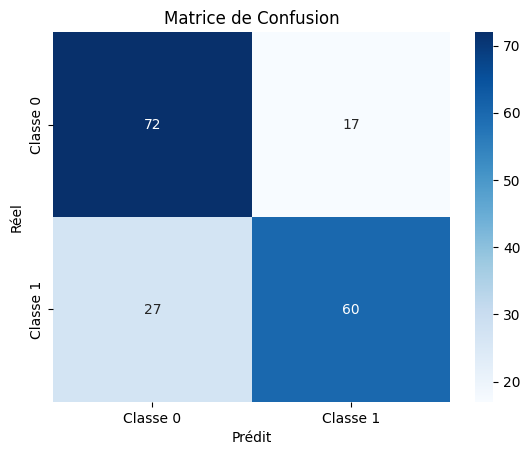

In [247]:
conf_matrixLogistic = confusion_matrix(y_testL, y_predL)
sns.heatmap(conf_matrixLogistic, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

### **Calcul de la courbe ROC** 

In [248]:
y_scoresL = model.predict_proba(X_testL)[:, 1]
fprL, tprL, _ = roc_curve(y_testL, y_scoresL)
roc_aucL = auc(fprL, tprL)

### **Affichage de la courbe ROC**

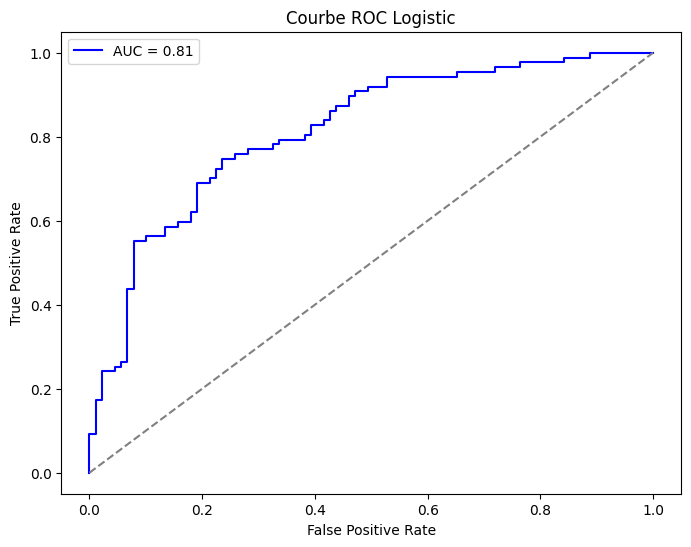

In [249]:
plt.figure(figsize=(8, 6))
plt.plot(fprL, tprL, color='blue', label=f'AUC = {roc_aucL:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC Logistic')
plt.legend()
plt.show()

### **Évaluation du modèle**

In [250]:
accuracyLogistic= accuracy_score(y_testL, y_predL)
print(f"Précision du modèle Logistic : {accuracyLogistic:.2f}")
print("\nRapport de classification Logistic:\n", classification_report(y_testL, y_predL))

Précision du modèle Logistic : 0.75

Rapport de classification Logistic:
               precision    recall  f1-score   support

           0       0.73      0.81      0.77        89
           1       0.78      0.69      0.73        87

    accuracy                           0.75       176
   macro avg       0.75      0.75      0.75       176
weighted avg       0.75      0.75      0.75       176



## **KNN**

###  Entraînement du modèle  :

### **Séparation des features et de la cible**

In [251]:
X = data.drop(columns=['Outcome'])
y = data['Outcome']

In [252]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)

X_resampled, y_resampled = smote.fit_resample(X,y)

In [253]:
X_trainK, X_testK, y_trainK, y_testK = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [254]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_trainK = scaler.fit_transform(X_trainK)
X_testK = scaler.transform(X_testK)

In [255]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_trainK,y_trainK)

KNeighborsClassifier()

- Le modèle utilisé ici est le KNeighborsClassifier de la bibliothèque sklearn.
   - Le nombre de voisins (n_neighbors=5) est spécifié pour l'algorithme K-Nearest Neighbors (KNN).
   - La fonction fit est utilisée pour entraîner le modèle en utilisant les données d'entraînement X_trainK et y_trainK.

In [256]:
X_resampled.shape

(876, 8)

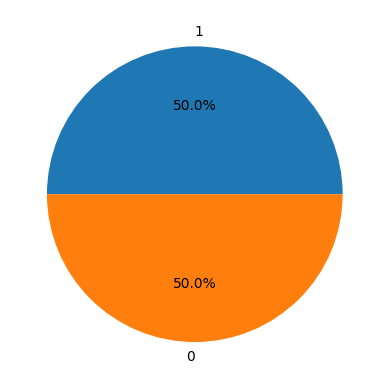

In [257]:
plt.pie(y_resampled.value_counts(),labels=data['Outcome'].unique(),autopct='%1.1f%%')
plt.show()

### **Prédiction sur les données de test**

In [258]:
y_predK = knn.predict(X_testK)

In [259]:
accuracyknn = accuracy_score(y_testK, y_predK)
print(f"Accuracy knn: {accuracyknn:.2f}")

Accuracy knn: 0.78


### **Matrice de confusion**

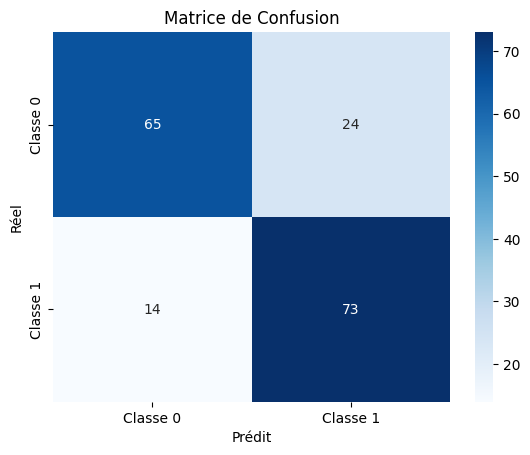

In [260]:
conf_matrixknn = confusion_matrix(y_testK, y_predK)
sns.heatmap(conf_matrixknn, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1' ], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

### **Calcul de la courbe ROC**

In [261]:
y_scoresK = knn.predict_proba(X_testK)[:, 1]
fprk, tprk, _ = roc_curve(y_testK, y_scoresK)
roc_auck = auc(fprk, tprk)

### **Affichage de la courbe ROC**

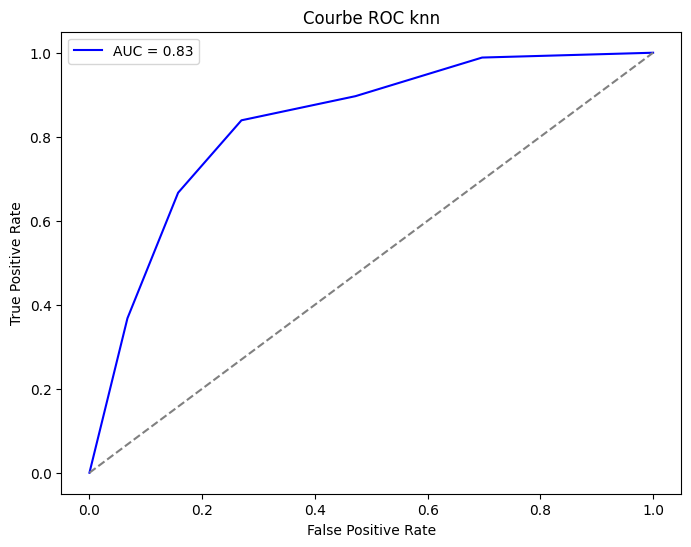

In [262]:
plt.figure(figsize=(8, 6))
plt.plot(fprk, tprk, color='blue', label=f'AUC = {roc_auck:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC knn')
plt.legend()
plt.show()

### **Évaluation du modèle**

In [263]:
accuracyknn = accuracy_score(y_testK, y_predK)
print(f"Précision du modèle knn : {accuracyknn:.2f}")
print("\nRapport de classification knn :\n", classification_report(y_testK, y_predK))

Précision du modèle knn : 0.78

Rapport de classification knn :
               precision    recall  f1-score   support

           0       0.82      0.73      0.77        89
           1       0.75      0.84      0.79        87

    accuracy                           0.78       176
   macro avg       0.79      0.78      0.78       176
weighted avg       0.79      0.78      0.78       176



## **DecisionTreeClassifier**

### **Séparation des features et de la cible**

In [264]:
X = data.drop(columns=['Outcome'])
y = data['Outcome']

In [265]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)

X_resampled, y_resampled = smote.fit_resample(X,y)

In [266]:
X_trainDT, X_testDT, y_trainDT, y_testDT = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [267]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
X_trainDT = scaler.fit_transform(X_trainDT)
X_testDT = scaler.transform(X_testDT)

### **Définition du modèle d'arbre de décision**

In [268]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)
dt.fit(X_trainDT, y_trainDT)

DecisionTreeClassifier(max_depth=5, random_state=42)

### **Visualisation de l’arbre de décision**

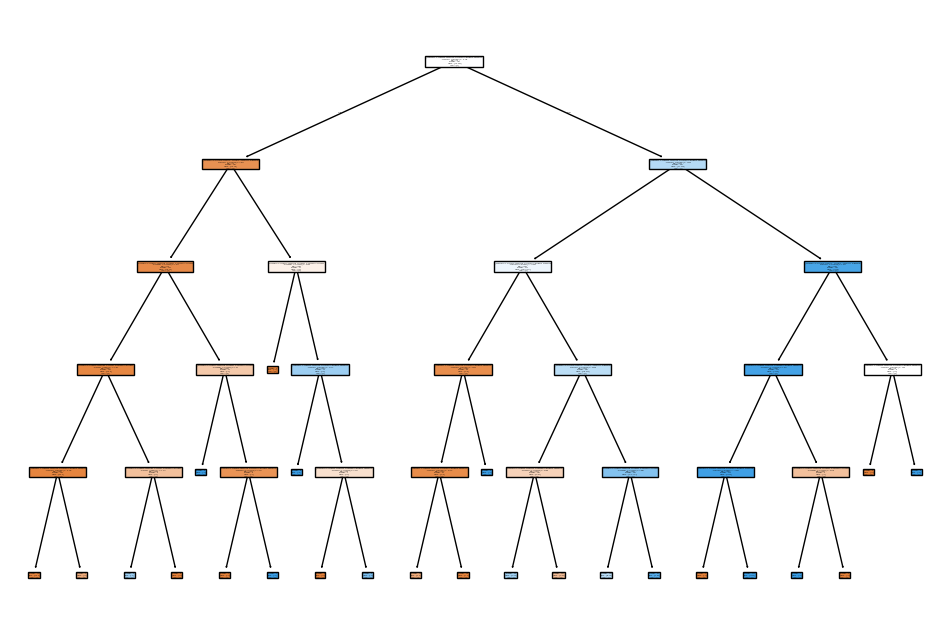

In [269]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(dt, filled=True, feature_names=X_trainDT, class_names=True)
plt.show()

### **Prédictions sur les données de test**

In [270]:
y_predDT = dt.predict(X_testDT)

### **Calcul de l'accuracy**

In [271]:
accuracydt = accuracy_score(y_testDT, y_predDT)
print(f"Précision du modèle d'Arbre de Décision: {accuracydt:.2f}")

Précision du modèle d'Arbre de Décision: 0.78


### **Évaluation du modèle**

In [272]:
accuracydt = accuracy_score(y_testDT, y_predDT)
print(f"Précision du modèle : {accuracydt:.2f}")
print("\nRapport de classification dt :\n", classification_report(y_testDT, y_predDT))

Précision du modèle : 0.78

Rapport de classification dt :
               precision    recall  f1-score   support

           0       0.77      0.80      0.78        89
           1       0.79      0.76      0.77        87

    accuracy                           0.78       176
   macro avg       0.78      0.78      0.78       176
weighted avg       0.78      0.78      0.78       176



### **Matrice de confusion**

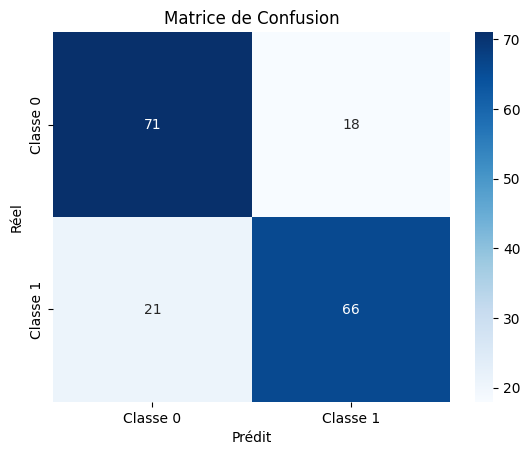

In [273]:
conf_matrixdt = confusion_matrix(y_testDT, y_predDT)
sns.heatmap(conf_matrixdt, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1' ], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

### **Calcul de la courbe ROC**

In [274]:
y_scoresDT = dt.predict_proba(X_testDT)[:, 1]
fprdt, tprdt, _ = roc_curve(y_testDT, y_scoresDT)
roc_aucdt = auc(fprdt, tprdt)

### **Affichage de la courbe ROC**

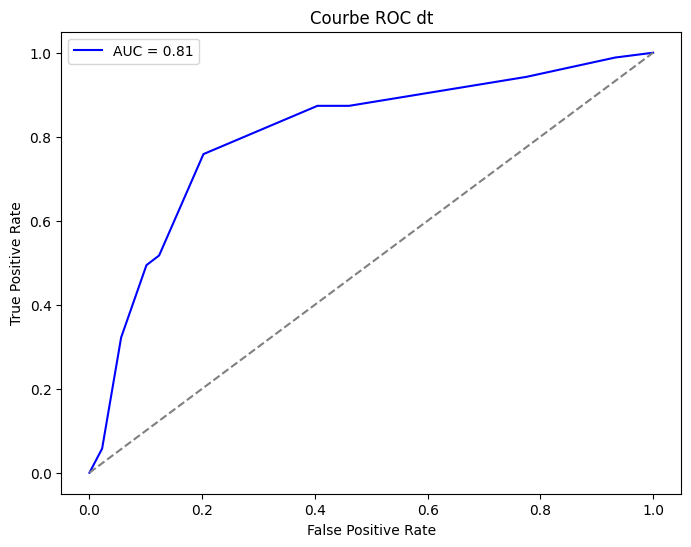

In [275]:
plt.figure(figsize=(8, 6))
plt.plot(fprdt, tprdt, color='blue', label=f'AUC = {roc_aucdt:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC dt')
plt.legend()
plt.show()

In [276]:
kf=KFold(n_splits=5,shuffle=True,random_state=42)
scores=cross_val_score(dt,X_resampled,y_resampled,cv=kf)
print(f"Scores de validation croisée : {scores}")
print(f"Score moyen : {scores.mean():.2f}")

Scores de validation croisée : [0.77840909 0.74857143 0.76       0.78857143 0.74857143]
Score moyen : 0.76


## **RandomForestClassifier**

### **Séparation des features et de la cible**

In [277]:
X = data.drop(columns=['Outcome'])
y = data['Outcome']

In [278]:
X.shape

(636, 8)

In [279]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)

X_resampled, y_resampled = smote.fit_resample(X,y)

In [280]:
X_trainR, X_testR, y_trainR, y_testR = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [281]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trainR = scaler.fit_transform(X_trainR)
X_testR = scaler.transform(X_testR)

### **Création et entraînement du modèle Random Forest**

In [282]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=300, criterion="gini", max_depth=150, random_state=42)
rf_classifier.fit(X_trainR, y_trainR)

RandomForestClassifier(max_depth=150, n_estimators=300, random_state=42)

### **Prédiction sur les données test**

In [283]:
y_predR = rf_classifier.predict(X_testR)

### **Calcul de l'accuracy**

In [284]:
accuracyRandomForest = accuracy_score(y_testR, y_predR)
print(f"Précision du modèle RandomForestClassifier: {accuracyRandomForest:.2f}")

Précision du modèle RandomForestClassifier: 0.82


### **Évaluation du modèle**

In [285]:
accuracyRandomForest = accuracy_score(y_testR, y_predR)
print(f"Précision du modèle : {accuracyRandomForest:.2f}")
print("\nRapport de classification RandomForest :\n", classification_report(y_testR, y_predR))

Précision du modèle : 0.82

Rapport de classification RandomForest :
               precision    recall  f1-score   support

           0       0.82      0.83      0.83        89
           1       0.83      0.82      0.82        87

    accuracy                           0.82       176
   macro avg       0.82      0.82      0.82       176
weighted avg       0.82      0.82      0.82       176



### **Matrice de confusion**

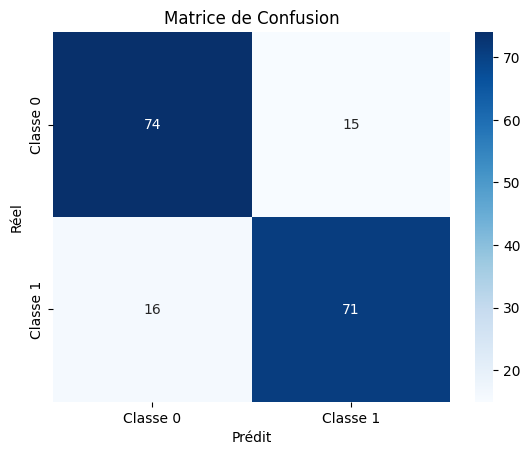

In [286]:
conf_matrixRandomForest = confusion_matrix(y_testR, y_predR)
sns.heatmap(conf_matrixRandomForest, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1' ], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

### **Calcul de la courbe ROC**

In [287]:
y_scoresR = rf_classifier.predict_proba(X_testR)[:, 1]
fprR, tprR, _ = roc_curve(y_testR, y_scoresR)
roc_aucR = auc(fprR, tprR)

### **Affichage de la courbe ROC**

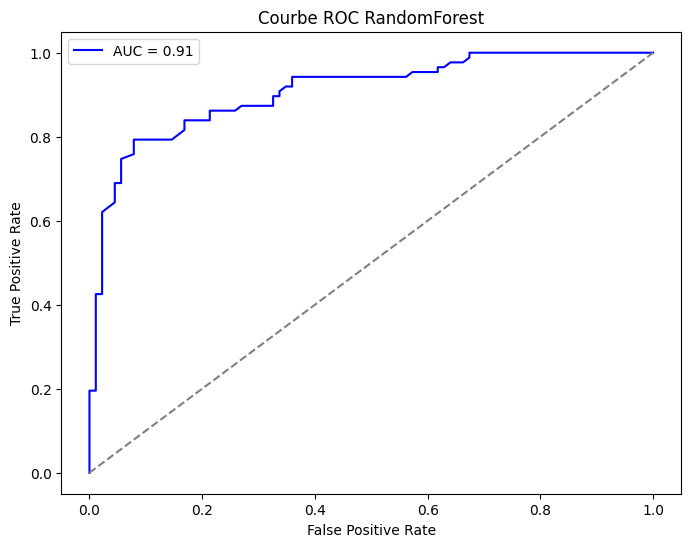

In [288]:
plt.figure(figsize=(8, 6))
plt.plot(fprR, tprR, color='blue', label=f'AUC = {roc_aucR:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC RandomForest')
plt.legend()
plt.show()

In [289]:
kf=KFold(n_splits=5,shuffle=True,random_state=42)
scores=cross_val_score(rf_classifier,X_resampled,y_resampled,cv=kf)
print(f"Scores de validation croisée : {scores}")
print(f"Score moyen : {scores.mean():.2f}")

Scores de validation croisée : [0.82954545 0.78285714 0.82857143 0.84571429 0.81714286]
Score moyen : 0.82


## **SVC**

### **Séparation des features et de la cible**

In [290]:
X = data.drop(columns=['Outcome'])
y = data['Outcome']

In [291]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)

X_resampled, y_resampled = smote.fit_resample(X,y)

In [292]:
X_trainS, X_testS, y_trainS, y_testS = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [293]:
scaler = StandardScaler()
X_trainS = scaler.fit_transform(X_trainS)
X_testS = scaler.transform(X_testS)

### **Création et entraînement du modèle SVM**

In [294]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel="rbf", C=1.0)
svm_classifier.fit(X_trainS, y_trainS)

SVC()

### **Calcul de l'accuracy**

In [295]:
y_predS = svm_classifier.predict(X_testS)

In [296]:
y_predS = accuracySVC = accuracy_score(y_testS,y_predS)
print(f"Précision du modèle RandomForestClassifier: {accuracySVC:.2f}")
y_predS = svm_classifier.predict(X_testS)
print(classification_report(y_testS, y_predS))

Précision du modèle RandomForestClassifier: 0.80
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        89
           1       0.79      0.79      0.79        87

    accuracy                           0.80       176
   macro avg       0.80      0.80      0.80       176
weighted avg       0.80      0.80      0.80       176



### **Matrice de confusion**

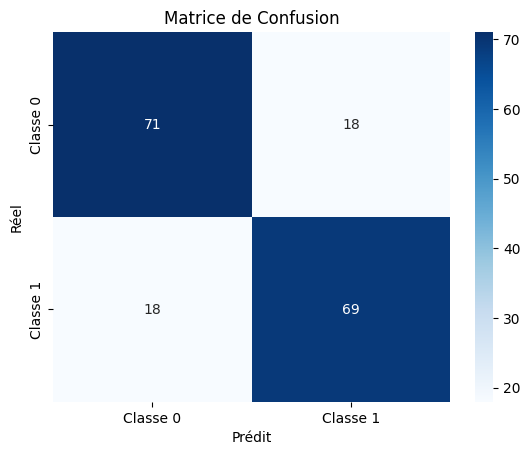

In [297]:
conf_matrixSVC = confusion_matrix(y_testS, y_predS)
sns.heatmap(conf_matrixSVC, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1' ], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

In [298]:
kf=KFold(n_splits=5,shuffle=True,random_state=42)
scores=cross_val_score(svm_classifier,X_resampled,y_resampled,cv=kf)
print(f"Scores de validation croisée : {scores}")
print(f"Score moyen : {scores.mean():.2f}")

Scores de validation croisée : [0.71590909 0.75428571 0.70285714 0.68571429 0.70285714]
Score moyen : 0.71


## **La comparaison entre les models**

### **l'accuracy et matrice de confusion de LogisticRegression**

Accuracy Logistic: 0.75

Rapport de classification Logistic:
               precision    recall  f1-score   support

           0       0.73      0.81      0.77        89
           1       0.78      0.69      0.73        87

    accuracy                           0.75       176
   macro avg       0.75      0.75      0.75       176
weighted avg       0.75      0.75      0.75       176



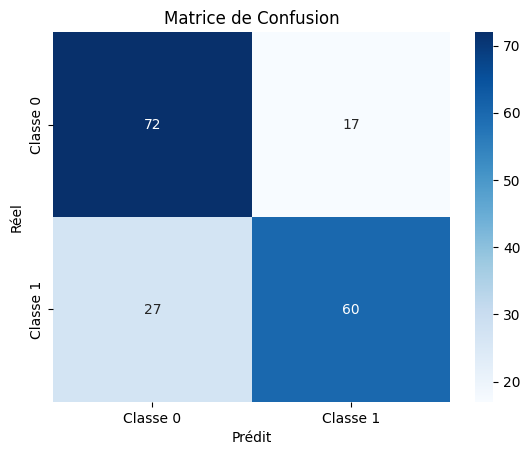

In [299]:
accuracyLogistic = accuracy_score(y_testL, y_predL)
print(f"Accuracy Logistic: {accuracyLogistic:.2f}")
print("\nRapport de classification Logistic:\n", classification_report(y_testL, y_predL))
 
conf_matrixLogistic = confusion_matrix(y_testL, y_predL)
sns.heatmap(conf_matrixLogistic, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

### **l'accuracy et matrice de confusion de KNN**

Accuracy knn: 0.78

Rapport de classification knn :
               precision    recall  f1-score   support

           0       0.82      0.73      0.77        89
           1       0.75      0.84      0.79        87

    accuracy                           0.78       176
   macro avg       0.79      0.78      0.78       176
weighted avg       0.79      0.78      0.78       176



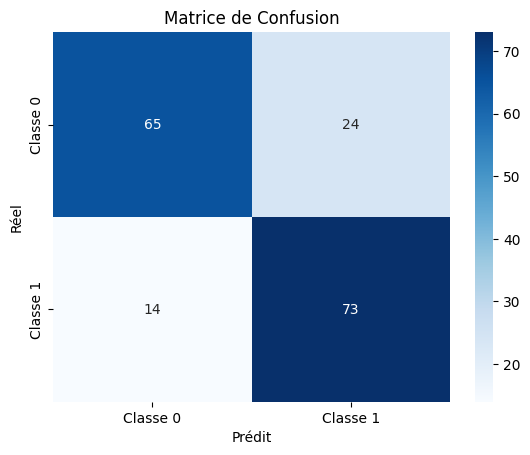

In [300]:
accuracyknn = accuracy_score(y_testK, y_predK)
print(f"Accuracy knn: {accuracyknn:.2f}")
print("\nRapport de classification knn :\n", classification_report(y_testK, y_predK))

conf_matrixknn = confusion_matrix(y_testK, y_predK)
sns.heatmap(conf_matrixknn, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1' ], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

### **l'accuracy et matrice de confusion de DecisionTreeClassifier**

Précision du modèle d'Arbre de Décision: 0.78

Rapport de classification dt :
               precision    recall  f1-score   support

           0       0.77      0.80      0.78        89
           1       0.79      0.76      0.77        87

    accuracy                           0.78       176
   macro avg       0.78      0.78      0.78       176
weighted avg       0.78      0.78      0.78       176



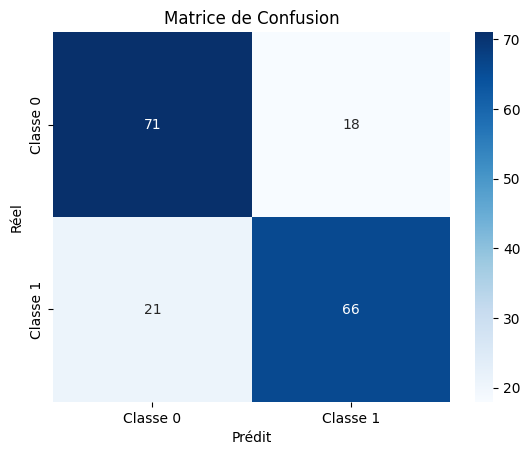

In [301]:
accuracydt = accuracy_score(y_testDT, y_predDT)
print(f"Précision du modèle d'Arbre de Décision: {accuracydt:.2f}")
print("\nRapport de classification dt :\n", classification_report(y_testDT, y_predDT))

conf_matrixdt = confusion_matrix(y_testDT, y_predDT)
sns.heatmap(conf_matrixdt, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1' ], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

### **l'accuracy et matrice de confusion de RandomForestClassifier**

Précision du modèle RandomForestClassifier: 0.82

Rapport de classification RandomForest :
               precision    recall  f1-score   support

           0       0.82      0.83      0.83        89
           1       0.83      0.82      0.82        87

    accuracy                           0.82       176
   macro avg       0.82      0.82      0.82       176
weighted avg       0.82      0.82      0.82       176



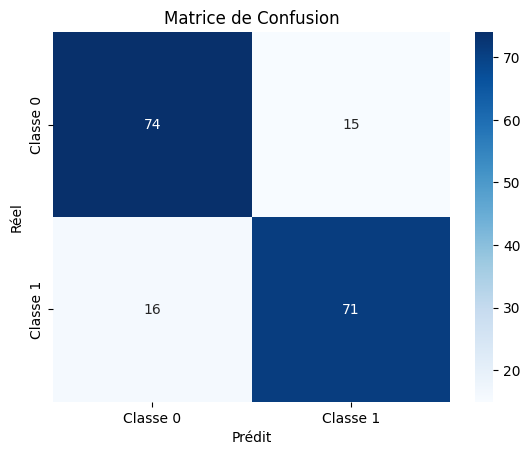

In [302]:
accuracyRandomForest = accuracy_score(y_testR, y_predR)
print(f"Précision du modèle RandomForestClassifier: {accuracyRandomForest:.2f}")
print("\nRapport de classification RandomForest :\n", classification_report(y_testR, y_predR))

conf_matrixRandomForest = confusion_matrix(y_testR, y_predR)
sns.heatmap(conf_matrixRandomForest, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1' ], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

### **l'accuracy et matrice de confusion de SVC**

Précision du modèle SVC: 0.80
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        89
           1       0.79      0.79      0.79        87

    accuracy                           0.80       176
   macro avg       0.80      0.80      0.80       176
weighted avg       0.80      0.80      0.80       176



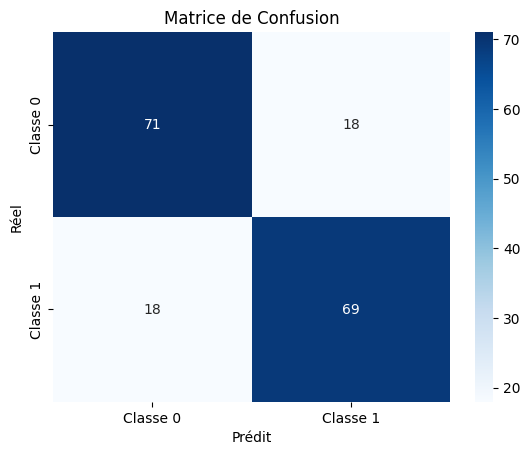

In [303]:
accuracySVC = accuracy_score(y_testS, y_predS)
print(f"Précision du modèle SVC: {accuracySVC:.2f}")
print(classification_report(y_testS, y_predS))

conf_matrixSVC = confusion_matrix(y_testS, y_predS)
sns.heatmap(conf_matrixSVC, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1' ], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

# Affichage de la courbe ROC de tous les models

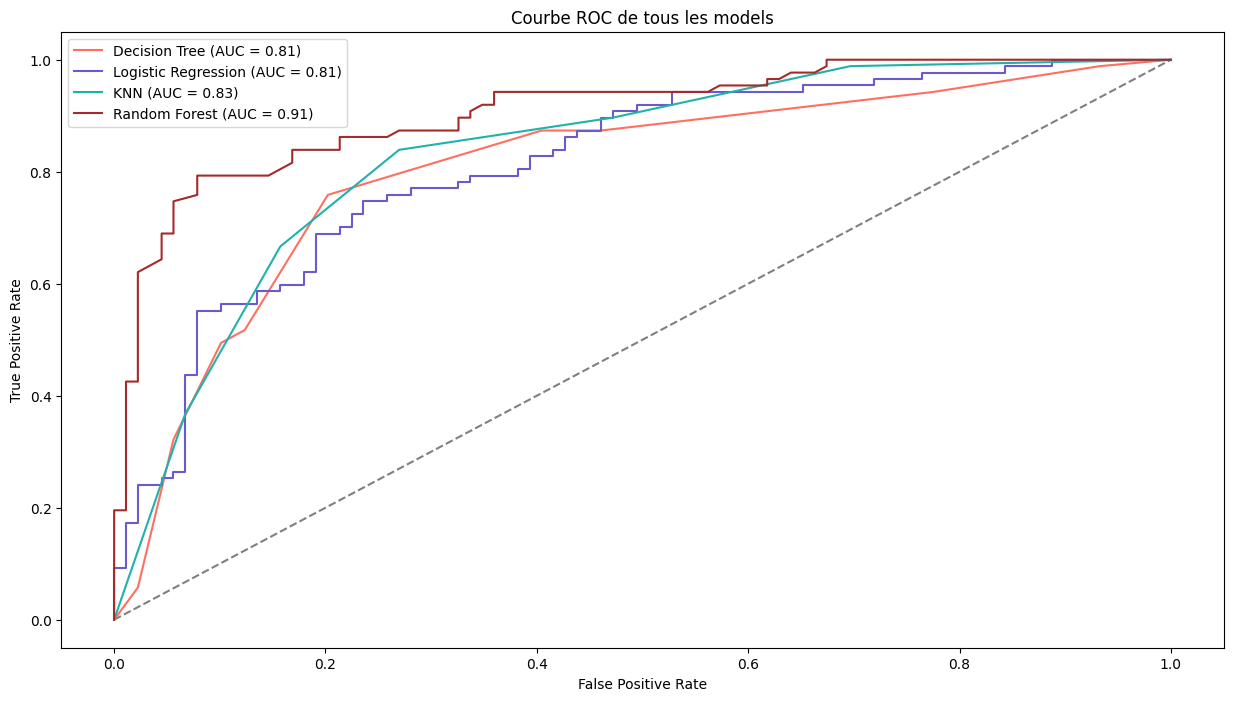

In [304]:
plt.figure(figsize=(15, 8))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.plot(fprdt, tprdt, color='#FF6F61', label=f'Decision Tree (AUC = {roc_aucdt:.2f})')       
plt.plot(fprL, tprL, color='#6A5ACD', label=f'Logistic Regression (AUC = {roc_aucL:.2f})')    
plt.plot(fprk, tprk, color='#20B2AA', label=f'KNN (AUC = {roc_auck:.2f})')                    
plt.plot(fprR, tprR, color='brown', label=f'Random Forest (AUC = {roc_aucR:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC de tous les models')
plt.legend()
plt.show()

### Random Forest est le meilleur avec une précision de 0.82

### SVC (Support Vector Classifier) arrive juste après avec 0.80

### KNN : 0.78

### Arbre de Décision : 0.78

### Régression Logistique : 0.75

# ***Prediction du modele le plus perforemant***:

#### Le meilleur modele utiliser est **RandomForest** , donc on le reuvaluer avec des nouveuax donees, pour revaluer la performance de ce modele  :

In [305]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [306]:
rf_classifier.predict([[5	,  80	,	65  ,	20	,  0  ,  28  ,	0.2  ,   20	 ]])

array([1], dtype=int64)

In [307]:
import joblib 
joblib.dump(rf_classifier,'diabetes_model.pkl')

['diabetes_model.pkl']

### ***prediction avec le modele enregestrer***

In [308]:
B_MODEL=joblib.load('diabetes_model.pkl')
B_MODEL.predict([[5	,  80	,	65  ,	20	,  0  ,  28  ,	0.2  ,   20	 ]])

array([1], dtype=int64)

In [309]:
import streamlit as st
import pandas as pd
import joblib

In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [310]:
B_MODEL = joblib.load("diabetes_model.pkl")